In [30]:
# import libs
import pandas as pd
import numpy as np
import glob
import os
import re

In [23]:
# https://regex101.com/r/abScq8/2
# building REGEX to search in the string begining alpha-characters
regex = re.compile('^[a-zA-Z]*')
regex

re.compile(r'^[a-zA-Z]*', re.UNICODE)

In [22]:
# reading all file and building a single dataframe
path = 'data/*'
all_files = glob.glob(path + "/*.csv")
li = []

# read data in the files, create data frame objects and add them to the list
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    full_name = os.path.basename(filename)

    # extracting from filename only first word in the name
    new_name = regex.match(full_name).group()

    df['filename'] = new_name
    li.append(df)

# concatenate dataframes into a single frame
frame = pd.concat(li, axis=0, ignore_index=True)
frame

,accelerometer_X,accelerometer_Y,accelerometer_Z,filename
0,1.000776,4.616021,8.576031,idle
1,0.718261,4.209007,8.446744,idle
2,-0.909797,-0.282516,9.203311,idle
3,5.099650,0.148441,8.418014,idle
4,1.762132,-0.162806,9.251195,idle
...,...,...,...,...
193855,5.109226,-15.452178,-1.470040,walking
193856,6.373365,-11.741165,-8.226476,walking
193857,3.289633,-9.993398,-0.383072,walking
193858,-2.978387,-3.050213,1.273715,walking


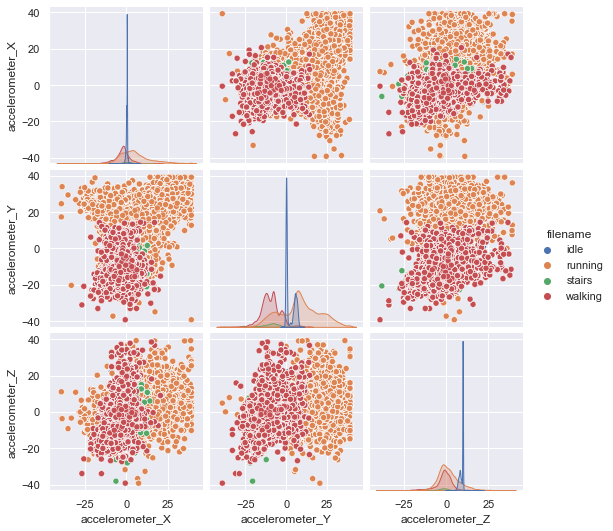

In [31]:
import seaborn as sns
sns.set()
sns.pairplot(frame, hue='filename')

In [60]:
len(frame)

193860

In [24]:
frame.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,filename
0,1.000776,4.616021,8.576031,idle
1,0.718261,4.209007,8.446744,idle
2,-0.909797,-0.282516,9.203311,idle
3,5.099650,0.148441,8.418014,idle
4,1.762132,-0.162806,9.251195,idle


In [25]:
frame.tail()

,accelerometer_X,accelerometer_Y,accelerometer_Z,filename
193855,5.109226,-15.452178,-1.470040,walking
193856,6.373365,-11.741165,-8.226476,walking
193857,3.289633,-9.993398,-0.383072,walking
193858,-2.978387,-3.050213,1.273715,walking
193859,-4.347870,-9.926360,-1.642422,walking


In [28]:
frame.loc[frame['filename'] == 'walking']

,accelerometer_X,accelerometer_Y,accelerometer_Z,filename
138360,2.322376,3.643975,11.827356,walking
138361,1.781286,4.668694,6.148310,walking
138362,7.963115,-4.113238,1.359907,walking
138363,1.996764,-1.398214,1.163582,walking
138364,5.185841,-12.143391,4.687847,walking
...,...,...,...,...
193855,5.109226,-15.452178,-1.470040,walking
193856,6.373365,-11.741165,-8.226476,walking
193857,3.289633,-9.993398,-0.383072,walking
193858,-2.978387,-3.050213,1.273715,walking


In [30]:
frame['accelerometer_X'].mean()

1.9235497301660986

In [49]:
frame['accelerometer_X']


0         1.000776
1         0.718261
2        -0.909797
3         5.099650
4         1.762132
            ...   
193855    5.109226
193856    6.373365
193857    3.289633
193858   -2.978387
193859   -4.347870
Name: accelerometer_X, Length: 193860, dtype: float64

In [43]:
frame.count()

TypeError: unhashable type: 'list'

In [26]:
type(frame['accelerometer_Z'])

pandas.core.series.Series

In [29]:
print(regex.match(""))

<re.Match object; span=(0, 0), match=''>


'walking'